# 2.3章 Iris_data_setを使用したパセープトロンモデルのトレーニング


https://github.com/rasbt/python-machine-learning-book-2nd-edition

## Irisデータセットの読み込み

以下のサイトからトレーニングデータを読み込みます。

#### https://archive.ics.uci.edu/ml/datasets/iris


In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## matplotlibを使用してデータをプロットする

matplotlibを使用することでデータをプロットすることができます。
ここではIris-setosaとIris-versicolorの花びらの長さと萼の長さをプロットしています。

/Users/daisuke/work/ml/myml/env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


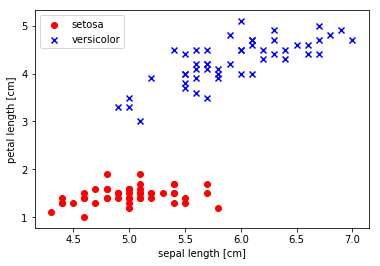

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-sentosaを-1, Iris-virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setosaのプロット（red o）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（blue x）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上）
plt.legend(loc='upper left')
# 図の表示
plt.show()

## パーセプトロンの分類機クラス

In [4]:
import numpy as np
class Perceptron(object):
    """ パーセプトロンの分類機
    パラメータ
    -----------
    eta: float
      学習率（0.0より大きく1.0以下の値）
    n_iter: int
      重みを初期化するための乱数シード
    属性
    -----------
    w_ : １次元配列
      適用後の重み
    errors: リスト
      各エポックでの誤分類（更新）の数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ トレーニングデータに適合させる
        パラメータ
        -----------
        X: { 配列のようなデータ構造 }, shape = [n_samples, n_features]
           トレーニングデータ
           n_samplesはサンプルの個数, n_featuresは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
           目的変数
        戻り値
        -----------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                # 重みw1,...wmの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw0の更新
                self.w_[0] += update
                # 重みの更新が 0 でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

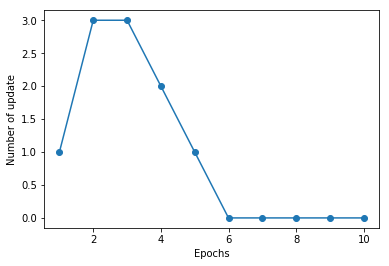

In [5]:
# パーセプトロンのオブジェクトの作成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of update')

plt.show()

### 決定領域をプロットするメソッド

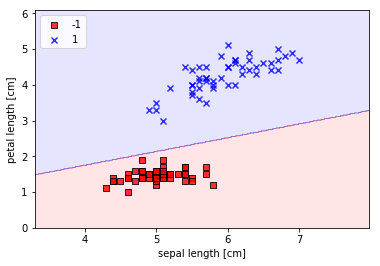

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1        
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
#     print("要素")
#     print(xx1)
#     print(xx2)
    
    # predict ()
    # 転置している.T
    # numpy.ndarray.T
#     print("np.array([xx1.ravel(), xx2.ravel()]).T")
#     print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     print("Z")
#     print(Z)
    
#     print("xx1")
#     print(xx1)
#     print("xx2")
#     print(xx2)

    
    Z = Z.reshape(xx1.shape)
#     print("Z")    
#     print(Z)
    
    # contourfは等高線を引く関数　alphaは色合い
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples（クラスのサンプルをプロット）
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


## 2次元データセットの決定境界を可視化するための便利な関数

# 2.4 ADALINEと学習の収束

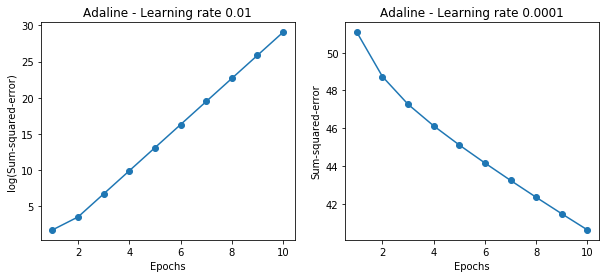

In [12]:
# ## Implementing an adaptive linear neuron in Python


class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()


# 2.5.2 特徴量のスケーリングを通じて勾配降下法を改善する

NumPyのmeanメソッドとstdメソッドを使用して標準化

In [13]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# print(X)
# print(X_std)


標準化したので、学習率 \begin{equation} \eta = 0.01 \end{equation}と小さなエポック数でADALINEを再びトレーニングして収束することを確認する


/Users/daisuke/work/ml/myml/env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


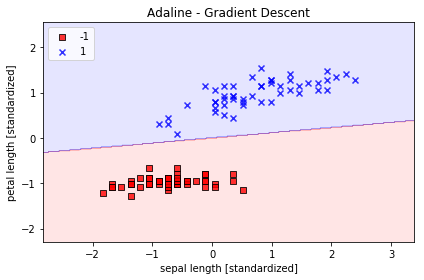

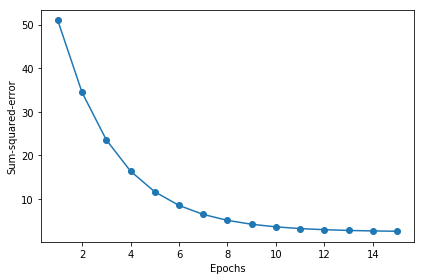

In [29]:
# 勾配降下法によるADALINEの学習
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)

# 決定領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# 2.6 大規模な機械学習と確率的勾配降下法


バッチ勾配降下法ではデータセットのサイズが大きい際に、計算コストが高くなってしまう。

この章ではバッチ勾配降下法の代わりによく使われる**確率的勾配降下法**について学んでいく。

In [33]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定されたトレーニングデータをシャッフル（この辺りが確率勾配降下法のキモ）
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost) / len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """重みを最初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # 目的変数 y の要素数が 2 以上の場合は
        # 各サンプルの特徴量 xi と目的変数 target で重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数 y の要素数が 1 の場合は
        # サンプル全体の特徴長 X と目的変数 y　で重みを更新
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

/Users/daisuke/work/ml/myml/env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


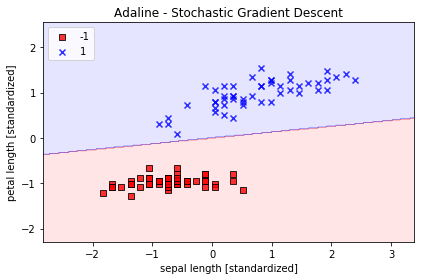

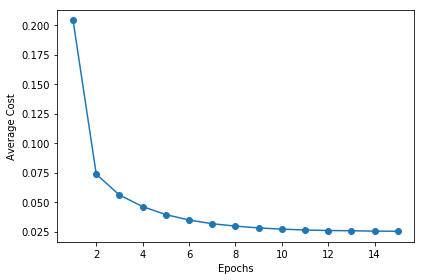

In [35]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()